<a href="https://colab.research.google.com/github/AMiller113/Machine_Learning/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generic tensorflow 2.0 install+import
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'2.0.0-beta1'

In [0]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Importing data using the wget shell command
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-01-01 20:54:22--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.4’

moore.csv.4         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-01-01 20:54:22 (57.0 MB/s) - ‘moore.csv.4’ saved [2302/2302]



In [0]:
#Load the data
data = pd.read_csv('moore.csv', header=None).values
x = data[:,0].reshape(-1, 1)
y = data[:,1]

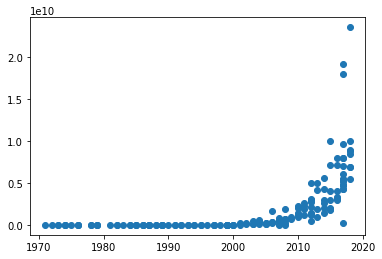

In [5]:
# Plotting the data in the csv files
plt.scatter(x,y)

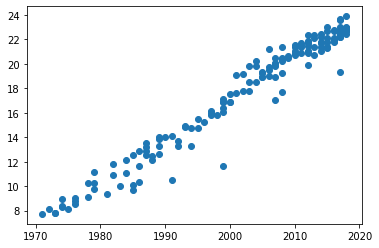

In [6]:
# Making the data linear rather than exponential
y = np.log(y)
plt.scatter(x, y)

In [0]:
# Centering the X - Values
x = x - x.mean() # No scaling in this case

In [0]:
# Creating the learning rate Schedule
def learning_rate_schedule(epochs, lr):
  if epochs >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_schedule) 

In [9]:
# Instantiating the model, adding the Dense function compiling the model, training the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation=None, input_shape=(1,)))
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')
r = model.fit(x, y, epochs= 200, callbacks=[scheduler]) # Assumedly there can be more than one callback function

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 411us/sample - loss: 344.1511
Epoch 2/200
162/162 [==============================] - 0s 51us/sample - loss: 333.9800
Epoch 3/200
162/162 [==============================] - 0s 51us/sample - loss: 280.6307
Epoch 4/200
162/162 [==============================] - 0s 64us/sample - loss: 258.2984
Epoch 5/200
162/162 [==============================] - 0s 52us/sample - loss: 200.8265
Epoch 6/200
162/162 [==============================] - 0s 49us/sample - loss: 136.3364
Epoch 7/200
162/162 [==============================] - 0s 48us/sample - loss: 88.9466
Epoch 8/200
162/162 [==============================] - 0s 46us/sample - loss: 61.6484
Epoch 9/200
162/162 [==============================] - 0s 61us/sample - loss: 53.6180
Epoch 10/200
162/162 [==============================] - 0s 55us/sample - loss: 47.0589
Epoch 11/200
162/162 [==============================] - 0s 55us/sample - loss: 56.2988
Epoch 12/200
162/162 [==

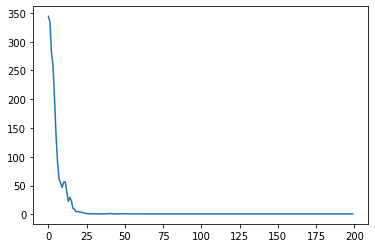

In [10]:
# Plotting the loss
plt.plot(r.history['loss'], label = 'loss')

In [11]:
# Getting the slope of the line, which should show the doubling of the transistor count
print(model.layers) # There is only one layer, the input layer is a dummy layer
print(model.layers[0].get_weights())
a = model.layers[0].get_weights()[0][0,0] # The shape of the arrays is a general shape for the dense layer rather than a shape consitent with the current output(s)

[array([[0.33498946]], dtype=float32), array([17.775206], dtype=float32)]


In [12]:
print('Time for transitors to double', np.log(2)/a)

Time to double 2.06916117310351
